### ①  모듈 및 데이터 로드


In [49]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [50]:
# 데이터 불러오기
used = pd.read_csv('used_car.csv')

In [51]:
used

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5908,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5909,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5910,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [52]:
# 데이터 확인
used.shape

(5912, 13)

In [53]:
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   object 
 1   Location           5912 non-null   object 
 2   Year               5912 non-null   int64  
 3   Kilometers_Driven  5912 non-null   int64  
 4   Fuel_Type          5912 non-null   object 
 5   Transmission       5912 non-null   object 
 6   Owner_Type         5912 non-null   object 
 7   Mileage            5910 non-null   object 
 8   Engine             5876 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5874 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              5912 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 600.6+ KB


In [54]:
# 범주형 데이터 확인, 범주형 별수별 카테코리 출력
print(used['Location'].unique())
print(used['Fuel_Type'].unique())
print(used['Transmission'].unique())
print(used['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


### ②  데이터셋 전처리

In [55]:
#결측치 검출
used.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5088
Price                   0
dtype: int64

In [56]:
# 결측치 제거
used.drop(["New_Price"],axis=1, inplace=True)


In [57]:
used.dropna(inplace=True)
used.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [58]:
used.shape

(5872, 12)

In [59]:
used = used.reset_index(drop=True)  # 인덱스 리셋
used.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
5871,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [60]:
# 범주형 데이터에서 수치 분리, 각 열을 공백으로 분리하고 첫번째 텍스트만 추출
used['Mileage_kmpl'] = used['Mileage'].str.split(" ").str[0]
used['Engine_cc'] = used['Engine'].str.split(" ").str[0]
used['Power_bhp'] = used['Power'].str.split(" ").str[0]

In [61]:
used

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_kmpl,Engine_cc,Power_bhp
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.2,1968,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,28.4,1248,74
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,24.4,1120,71
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,14.0,2498,112
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,18.9,998,67.1


In [62]:
# 분리한 열은 텍스트이므로 실수형으로 변환
used['Mileage_kmpl'] = used['Mileage_kmpl'].astype(float)
used['Engine_cc'] = used['Engine_cc'].astype(float)
used['Power_bhp'] = used['Power_bhp'].astype(float)

In [63]:
# 불필요 열 삭제
used.drop(["Name"], axis=1,inplace=True)
used.drop(["Mileage"],axis=1,inplace=True)
used.drop(["Engine"],axis=1,inplace=True)
used.drop(["Power"],axis=1,inplace=True)
used.drop(["Location"],axis=1,inplace=True)


In [64]:
# 범주형 데이터 확인
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Seats              5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Mileage_kmpl       5872 non-null   float64
 8   Engine_cc          5872 non-null   float64
 9   Power_bhp          5872 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 458.9+ KB


In [65]:
var_list = ['Fuel_Type', 'Transmission','Owner_Type']
for var in var_list:
    print(var)
    print(used[var].value_counts())

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Transmission
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64


In [66]:
# 수치형 데이터 정보 요약
used.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage_kmpl,Engine_cc,Power_bhp
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,5.283719,9.603919,18.277839,1625.745572,113.276894
std,3.164568,9.216941e+04,0.805081,11.249453,4.365657,601.641783,53.881892
min,1998.000000,1.710000e+02,2.000000,0.440000,0.000000,624.000000,34.200000
25%,2012.000000,3.342250e+04,5.000000,3.517500,15.260000,1198.000000,75.000000
50%,2014.000000,5.260900e+04,5.000000,5.750000,18.200000,1495.500000,97.700000
75%,2016.000000,7.240275e+04,5.000000,10.000000,21.100000,1991.000000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


<AxesSubplot:ylabel='Frequency'>

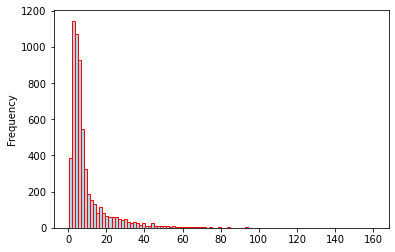

In [67]:
# 시각화
used['Price'].plot.hist(bins=100,color = "lightblue", edgecolor = "red")  # Price 분포

<AxesSubplot:title={'center':'Price'}, xlabel='Fuel_Type'>

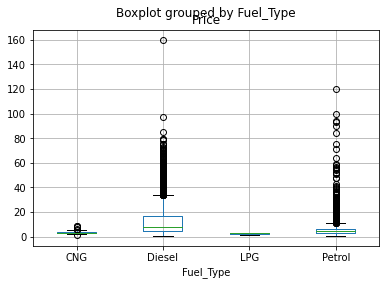

In [68]:
used.boxplot(column = ["Price"], by = "Fuel_Type")    # 연료별 가격대

In [69]:
train = pd.get_dummies(used)
train

,Year,Kilometers_Driven,Seats,Price,Mileage_kmpl,Engine_cc,Power_bhp,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,1,1,0,0,0
1,2015,41000,5.0,12.50,19.67,1582.0,126.20,0,1,0,0,0,1,1,0,0,0
2,2011,46000,5.0,4.50,18.20,1199.0,88.70,0,0,0,1,0,1,1,0,0,0
3,2012,87000,7.0,6.00,20.77,1248.0,88.76,0,1,0,0,0,1,1,0,0,0
4,2013,40670,5.0,17.74,15.20,1968.0,140.80,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,5.0,4.75,28.40,1248.0,74.00,0,1,0,0,0,1,1,0,0,0
5868,2015,100000,5.0,4.00,24.40,1120.0,71.00,0,1,0,0,0,1,1,0,0,0
5869,2012,55000,8.0,2.90,14.00,2498.0,112.00,0,1,0,0,0,1,0,0,1,0
5870,2013,46000,5.0,2.65,18.90,998.0,67.10,0,0,0,1,0,1,1,0,0,0


In [37]:
#  독립변수 평균 및 표준편차 계산
stats = train.describe()			# 데이터 요약
stats.pop("Price")			# 종속변수 제거
stats = stats.transpose()		# 행, 렬 변환
stats.to_csv("used_stats.csv",encoding="CP949")	# 모델 활용을 위해 stats를 csv로 저장
stats				# 데이터 확인


,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.0,2012.00,2014.0,2016.00,2019.00
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.0,33422.50,52609.0,72402.75,6500000.00
Seats,5872.0,5.283719,0.805081,2.0,5.00,5.0,5.00,10.00
Mileage_kmpl,5872.0,18.277839,4.365657,0.0,15.26,18.2,21.10,33.54
Engine_cc,5872.0,1625.745572,601.641783,624.0,1198.00,1495.5,1991.00,5998.00
Power_bhp,5872.0,113.276894,53.881892,34.2,75.00,97.7,138.10,560.00
Fuel_Type_CNG,5872.0,0.009366,0.096334,0.0,0.00,0.0,0.00,1.00
Fuel_Type_Diesel,5872.0,0.536785,0.498688,0.0,0.00,1.0,1.00,1.00
Fuel_Type_LPG,5872.0,0.001703,0.041236,0.0,0.00,0.0,0.00,1.00
Fuel_Type_Petrol,5872.0,0.452146,0.497747,0.0,0.00,0.0,1.00,1.00


# 딥러닝 학습

In [25]:
# 데이터 분할
x_train = train.sample(frac=0.8,random_state=0)	# 데이터셋 분리 train 80%
x_test = train.drop(x_train.index)			# test 데이터셋 생성
y_train = x_train.pop("Price")			# Price를 x_train에서 제거 후 y_train에 저장
y_test = x_test.pop("Price")			# Price를 x_test에서 제거 후 y_test에 저장


In [26]:
# 데이터셋 표준화, 모델의 정확도 향상을 위해 극단값에 의한 영향을 제거
def norm(x):
  return (x - stats['mean']) / stats['std']		# x를 한행씩 읽어와서 표준화 후 리턴
normed_train = norm(x_train)			# x_train 표준화
normed_test = norm(x_test)			# y_train 표준화


In [70]:
normed_train.shape, normed_test.shape 

((4698, 16), (1174, 16))

### ③ 모델링 및 평가

In [28]:
#  네트워크 구조 정의
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu',input_shape=[len(x_train.keys())]),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)])


In [29]:
model.summary() 	# 네트워크 구조 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


In [30]:
#  모델 컴파일
# 컴파일시 손실함수로 mse, 최적화 함수로 Adam, 평가지표로 mae, mse 사용
optimizer = tf.keras.optimizers.Adam(0.001)
#optimizer = tf.keras.optimizers.RMSprop(0.001) #변경해서 학습해볼것
model.compile(loss='mse',  optimizer=optimizer, metrics=['mae', 'mse'])  


In [31]:
#  학습 및 평가
# train 데이터 중 25%를 validation 데이터로 나눠 학습, val_loss가 20 epochs 동안 향상이 안될때 학습 종료
history= model.fit(normed_train, y_train, epochs=500,batch_size=64, validation_split=0.25,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss')])

model.evaluate(normed_test, y_test, verbose=0)	# test 데이터셋으로 모델 평가


Epoch 1/500
56/56 [==============================] - 1s 3ms/step - loss: 147.3844 - mae: 6.7818 - mse: 147.3844 - val_loss: 38.5304 - val_mae: 3.7561 - val_mse: 38.5304
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 34.6525 - mae: 3.2663 - mse: 34.6525 - val_loss: 22.2140 - val_mae: 2.4539 - val_mse: 22.2140
Epoch 3/500
56/56 [==============================] - 0s 2ms/step - loss: 24.2721 - mae: 2.5485 - mse: 24.2721 - val_loss: 21.0889 - val_mae: 2.3265 - val_mse: 21.0889
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 22.0660 - mae: 2.3837 - mse: 22.0660 - val_loss: 20.5241 - val_mae: 2.2095 - val_mse: 20.5241
Epoch 5/500
56/56 [==============================] - 0s 2ms/step - loss: 20.9560 - mae: 2.3052 - mse: 20.9560 - val_loss: 20.0811 - val_mae: 2.1876 - val_mse: 20.0811
Epoch 6/500
56/56 [==============================] - 0s 2ms/step - loss: 19.8984 - mae: 2.2174 - mse: 19.8984 - val_loss: 21.3293 - val_mae: 2.2297 - val_mse: 21.3

Epoch 50/500
56/56 [==============================] - 0s 1ms/step - loss: 14.9916 - mae: 1.9609 - mse: 14.9916 - val_loss: 19.4120 - val_mae: 2.1570 - val_mse: 19.4120
Epoch 51/500
56/56 [==============================] - 0s 1ms/step - loss: 13.5362 - mae: 1.8795 - mse: 13.5362 - val_loss: 18.6132 - val_mae: 1.9135 - val_mse: 18.6132
Epoch 52/500
56/56 [==============================] - 0s 1ms/step - loss: 13.2541 - mae: 1.8433 - mse: 13.2541 - val_loss: 21.4147 - val_mae: 2.0258 - val_mse: 21.4147
Epoch 53/500
56/56 [==============================] - 0s 1ms/step - loss: 13.3490 - mae: 1.8560 - mse: 13.3490 - val_loss: 20.9291 - val_mae: 1.9650 - val_mse: 20.9291
Epoch 54/500
56/56 [==============================] - 0s 1ms/step - loss: 13.1711 - mae: 1.7977 - mse: 13.1711 - val_loss: 21.4180 - val_mae: 1.9768 - val_mse: 21.4180


[14.757253646850586, 1.9053360223770142, 14.757253646850586]

In [32]:
# history 출력
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
49,14.991640,1.960914,14.991640,19.412048,2.156993,19.412048,49
50,13.536195,1.879500,13.536195,18.613161,1.913538,18.613161,50
51,13.254091,1.843278,13.254091,21.414671,2.025807,21.414671,51
52,13.349021,1.855953,13.349021,20.929129,1.965024,20.929129,52
53,13.171053,1.797685,13.171053,21.417992,1.976753,21.417992,53


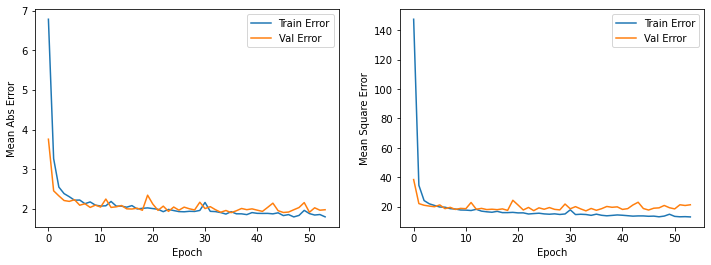

In [33]:
#  train, validation 데이터셋의 mae, mse 그래프 출력
hist = pd.DataFrame(history.history)	# history.history에 저장된 값을 데이터프레임으로 변환
hist['epoch'] = history.epoch		# hist 데이터프레임에 ‘epoch’열 추가
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)			# MAE 그래프 출력
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
plt.legend()

plt.subplot(1,2,2)				# MSE 그래프 출력
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
plt.legend()
plt.show()


Text(0, 0.5, 'Predict')

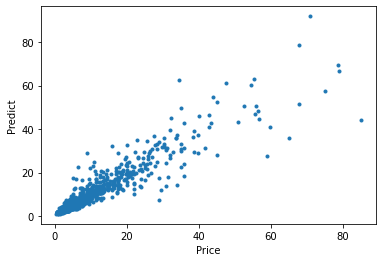

In [34]:
# 테스트 데이터로 원래 데이터와 예측결과 비교
pred = model.predict(normed_test)
plt.scatter(y_test,pred, marker=".")
plt.xlabel('Price')
plt.ylabel('Predict')


In [35]:
# 결정계수(r squared) 산출
y = y_test.to_numpy()
ybar = np.sum(y)/len(y)
ssr = np.sum((pred-ybar)**2)
sst =  np.sum((y-ybar)**2)
r_squared =ssr/sst
print(round(r_squared*100,2),"%")


90.96 %


In [36]:
# 케라스 모델로 저장
save_path = 'used_model.h5'
model.save(save_path, include_optimizer=True)
